# Data preprocessing

In [1]:
import pandas as pd
import json
import random

make unlabeled tsv file from jsonl with 2 column(% 80 for unlabeled)

In [2]:
# Load the JSON file line by line
json_file_path = "E:/subtaskB_train.jsonl"
data = []
with open(json_file_path, 'r') as file:
    for line in file:
        data.append(json.loads(line))
# Randomly sample 50% of the rows
sampled_data = random.sample(data, k=int(len(data) * 0.8))
# Create a DataFrame from the sampled data
df = pd.DataFrame(sampled_data)
# Create a new DataFrame with the desired format
result_df = pd.DataFrame({
    'model': ['UNK'] * len(df),
    'text': df['text']
})
# Save the result DataFrame to a TSV file without column names and index
tsv_output_path = 'unlabel.tsv'
result_df.to_csv(tsv_output_path, sep='\t', index=False, header=False)
# Print the result DataFrame
print(result_df)

      model                                               text
0       UNK  Riho Iida (born 1974) is a Japanese voice acto...
1       UNK  A differentially rotating force-free magnetosp...
2       UNK  Blue Hills Reservation is a state park located...
3       UNK  We present the results of our numerical simula...
4       UNK   This is usually a multiple of 100 (most often...
...     ...                                                ...
56816   UNK   Deborah Pratt (born Deborah Lee Howell; Augus...
56817   UNK  \n\nHow to Make Strawberry Cheesecake\n\nMakin...
56818   UNK  \n\nWe consider the Lieb-Oxford bound on the e...
56819   UNK  If you're using an older version of Microsoft ...
56820   UNK  The Carter constant, a proportionality constan...

[56821 rows x 2 columns]


make labeled tsv file from jsonl with 2 column(% 20 for labeled)

In [3]:
# Load the JSON file line by line
json_file_path = "E:/subtaskB_train.jsonl"
data = []
with open(json_file_path, 'r') as file:
    for line in file:
        data.append(json.loads(line))
# Randomly sample 50% of the rows
sampled_data = random.sample(data, k=int(len(data) * 0.2))
# Create a DataFrame from the loaded data
df = pd.DataFrame(sampled_data)
# Create a new DataFrame with the desired format
result_df = pd.DataFrame({
    'model': df['model'].apply(lambda x: f'{x}'),
    'text': df['text']
})
# Save the result DataFrame to a TSV file without column names and index
tsv_output_path = 'label.tsv'
result_df.to_csv(tsv_output_path, sep='\t', index=False, header=False)
# Print the result DataFrame
print(result_df)

         model                                               text
0       cohere  \n\nHow to Play Howrse\nHowrse is a fun, brows...
1       bloomz  We present results on semi-inclusive deep-inel...
2      chatGPT  In this study, we investigate the abundance of...
3       cohere   Marcus Crassus was a Roman general and states...
4      chatGPT  Madonna of the Candelabra is a painting create...
...        ...                                                ...
14200    dolly  Lyady, Vitebsk Region is a town in southwester...
14201    human  The Mount Gretna Narrow Gauge Railway was a  n...
14202   cohere  \nWe study the Casimir effect in a 6D warped f...
14203    dolly  Direct burial of cable under soil is the most ...
14204  davinci   Toribio Losoya (1810 – March 6, 1836) was a S...

[14205 rows x 2 columns]


make test tsv file from jsonl with 2 column

In [4]:
# Load the JSON file line by line
json_file_path = "E:/subtaskB_dev.jsonl"
data = []
with open(json_file_path, 'r') as file:
    for line in file:
        data.append(json.loads(line))
# Create a DataFrame from the loaded data
df = pd.DataFrame(data)
# Create a new DataFrame with the desired format
result_df = pd.DataFrame({
    'model': df['model'].apply(lambda x: f'{x}'),
    'text': df['text']
})
# Save the result DataFrame to a TSV file without column names and index
tsv_output_path = 'test.tsv'
result_df.to_csv(tsv_output_path, sep='\t', index=False, header=False)
# Print the result DataFrame
print(result_df)

        model                                               text
0     chatGPT  Overall, I found the paper "Machine Comprehens...
1     chatGPT  This paper "Machine Comprehension Using Match-...
2     chatGPT  The paper presents an end-to-end neural archit...
3     chatGPT  This paper proposes an end-to-end neural archi...
4     chatGPT  Title: Incorporating long-range consistency in...
...       ...                                                ...
2995    dolly  The paper Energy-Based Spherical Sparse Coding...
2996    dolly  Dear Author, I have reviewed your submitted pa...
2997    dolly  Denoising Auto-Encoders (DAE) have been used i...
2998    dolly  The paper Revisiting Denoising Auto-Encoders, ...
2999    dolly  This paper Revisiting Denoising Auto-Encoders ...

[3000 rows x 2 columns]


set column names to 'model' and 'text' for labeled tsv file

In [5]:
file_path = 'label.tsv'
# Read the TSV file and explicitly set column names to 'model' and 'text'
df = pd.read_csv(file_path, delimiter='\t', names=['model', 'text'])
# Print the updated DataFrame
print(df)
# Save the DataFrame to a new TSV file with the updated column names
output_file_path = 'label_1.tsv'
df.to_csv(output_file_path, sep='\t', index=False)

         model                                               text
0       cohere  \n\nHow to Play Howrse\nHowrse is a fun, brows...
1       bloomz  We present results on semi-inclusive deep-inel...
2      chatGPT  In this study, we investigate the abundance of...
3       cohere   Marcus Crassus was a Roman general and states...
4      chatGPT  Madonna of the Candelabra is a painting create...
...        ...                                                ...
14200    dolly  Lyady, Vitebsk Region is a town in southwester...
14201    human  The Mount Gretna Narrow Gauge Railway was a  n...
14202   cohere  \nWe study the Casimir effect in a 6D warped f...
14203    dolly  Direct burial of cable under soil is the most ...
14204  davinci   Toribio Losoya (1810 – March 6, 1836) was a S...

[14205 rows x 2 columns]


set column names to 'model' and 'text' for unlabeled tsv file

In [6]:
file_path = 'unlabel.tsv'
# Read the TSV file and explicitly set column names to 'model' and 'text'
df = pd.read_csv(file_path, delimiter='\t', names=['model', 'text'])
# Print the updated DataFrame
print(df)
# Save the DataFrame to a new TSV file with the updated column names
output_file_path = 'unlabel_1.tsv'
df.to_csv(output_file_path, sep='\t', index=False)

      model                                               text
0       UNK  Riho Iida (born 1974) is a Japanese voice acto...
1       UNK  A differentially rotating force-free magnetosp...
2       UNK  Blue Hills Reservation is a state park located...
3       UNK  We present the results of our numerical simula...
4       UNK   This is usually a multiple of 100 (most often...
...     ...                                                ...
56816   UNK   Deborah Pratt (born Deborah Lee Howell; Augus...
56817   UNK  \n\nHow to Make Strawberry Cheesecake\n\nMakin...
56818   UNK  \n\nWe consider the Lieb-Oxford bound on the e...
56819   UNK  If you're using an older version of Microsoft ...
56820   UNK  The Carter constant, a proportionality constan...

[56821 rows x 2 columns]


set column names to 'model' and 'text' for test tsv file

In [7]:
file_path = 'test.tsv'
# Read the TSV file and explicitly set column names to 'model' and 'text'
df = pd.read_csv(file_path, delimiter='\t', names=['model', 'text'])
# Print the updated DataFrame
print(df)
# Save the DataFrame to a new TSV file with the updated column names
output_file_path = 'test_1.tsv'
df.to_csv(output_file_path, sep='\t', index=False)

        model                                               text
0     chatGPT  Overall, I found the paper "Machine Comprehens...
1     chatGPT  This paper "Machine Comprehension Using Match-...
2     chatGPT  The paper presents an end-to-end neural archit...
3     chatGPT  This paper proposes an end-to-end neural archi...
4     chatGPT  Title: Incorporating long-range consistency in...
...       ...                                                ...
2995    dolly  The paper Energy-Based Spherical Sparse Coding...
2996    dolly  Dear Author, I have reviewed your submitted pa...
2997    dolly  Denoising Auto-Encoders (DAE) have been used i...
2998    dolly  The paper Revisiting Denoising Auto-Encoders, ...
2999    dolly  This paper Revisiting Denoising Auto-Encoders ...

[3000 rows x 2 columns]


Merge "model" and "text" columns with a space in between for test tsv file

In [8]:
# Read the TSV file into a DataFrame
file_path = 'test_1.tsv'  
df = pd.read_csv(file_path, sep='\t')
# Merge "model" and "text" columns with a space in between
df['merged'] = df['model'] + ' ' + df['text']
# Drop the original "model" and "text" columns
df = df.drop(['model', 'text'], axis=1)
# Save the modified DataFrame to a new TSV file
output_file_path = 'test_2.tsv'  # Replace 'output_file.tsv' with the desired output file path
df.to_csv(output_file_path, sep='\t', index=False)
# Print or use the modified DataFrame as needed
print(df)

                                                 merged
0     chatGPT Overall, I found the paper "Machine Co...
1     chatGPT This paper "Machine Comprehension Usin...
2     chatGPT The paper presents an end-to-end neura...
3     chatGPT This paper proposes an end-to-end neur...
4     chatGPT Title: Incorporating long-range consis...
...                                                 ...
2995  dolly The paper Energy-Based Spherical Sparse ...
2996  dolly Dear Author, I have reviewed your submit...
2997  dolly Denoising Auto-Encoders (DAE) have been ...
2998  dolly The paper Revisiting Denoising Auto-Enco...
2999  dolly This paper Revisiting Denoising Auto-Enc...

[3000 rows x 1 columns]


Merge "model" and "text" columns with a space in between for labeled tsv file

In [9]:
# Read the TSV file into a DataFrame
file_path = 'label_1.tsv'  
df = pd.read_csv(file_path, sep='\t')
# Merge "model" and "text" columns with a space in between
df['merged'] = df['model'] + ' ' + df['text']
# Drop the original "model" and "text" columns
df = df.drop(['model', 'text'], axis=1)
# Save the modified DataFrame to a new TSV file
output_file_path = 'label_2.tsv'  # Replace 'output_file.tsv' with the desired output file path
df.to_csv(output_file_path, sep='\t', index=False)
# Print or use the modified DataFrame as needed
print(df)

                                                  merged
0      cohere \n\nHow to Play Howrse\nHowrse is a fun...
1      bloomz We present results on semi-inclusive de...
2      chatGPT In this study, we investigate the abun...
3      cohere  Marcus Crassus was a Roman general and...
4      chatGPT Madonna of the Candelabra is a paintin...
...                                                  ...
14200  dolly Lyady, Vitebsk Region is a town in south...
14201  human The Mount Gretna Narrow Gauge Railway wa...
14202  cohere \nWe study the Casimir effect in a 6D w...
14203  dolly Direct burial of cable under soil is the...
14204  davinci  Toribio Losoya (1810 – March 6, 1836)...

[14205 rows x 1 columns]


Merge "model" and "text" columns with a space in between for unlabeled tsv file

In [10]:
# Read the TSV file into a DataFrame
file_path = 'unlabel_1.tsv'  
df = pd.read_csv(file_path, sep='\t')
# Merge "model" and "text" columns with a space in between
df['merged'] = df['model'] + ' ' + df['text']
# Drop the original "model" and "text" columns
df = df.drop(['model', 'text'], axis=1)
# Save the modified DataFrame to a new TSV file
output_file_path = 'unlabel_2.tsv'  # Replace 'output_file.tsv' with the desired output file path
df.to_csv(output_file_path, sep='\t', index=False)
# Print or use the modified DataFrame as needed
print(df)

                                                  merged
0      UNK Riho Iida (born 1974) is a Japanese voice ...
1      UNK A differentially rotating force-free magne...
2      UNK Blue Hills Reservation is a state park loc...
3      UNK We present the results of our numerical si...
4      UNK  This is usually a multiple of 100 (most o...
...                                                  ...
56816  UNK  Deborah Pratt (born Deborah Lee Howell; A...
56817  UNK \n\nHow to Make Strawberry Cheesecake\n\nM...
56818  UNK \n\nWe consider the Lieb-Oxford bound on t...
56819  UNK If you're using an older version of Micros...
56820  UNK The Carter constant, a proportionality con...

[56821 rows x 1 columns]


remove extra space of labeled tsv file to handle in a best way

In [11]:
with open('label_2.tsv', 'rb') as file:
    lines = file.readlines()
# Remove newlines within each row, remove double quotes at the beginning and end
modified_lines = [line.strip(b'"\n').replace(b'"', b'') for line in lines]
with open('label_3.tsv', 'wb') as output_file:
    output_file.writelines(modified_lines)

remove extra space of unlabeled tsv file to handle in a best way

In [12]:
with open('unlabel_2.tsv', 'rb') as file:
    lines = file.readlines()
# Remove newlines within each row, remove double quotes at the beginning and end
modified_lines = [line.strip(b'"\n').replace(b'"', b'') for line in lines]
with open('unlabel_3.tsv', 'wb') as output_file:
    output_file.writelines(modified_lines)

remove extra space of test tsv file to handle in a best way

In [13]:
with open('test_2.tsv', 'rb') as file:
    lines = file.readlines()
# Remove newlines within each row, remove double quotes at the beginning and end
modified_lines = [line.strip(b'"\n').replace(b'"', b'') for line in lines]
with open('test_3.tsv', 'wb') as output_file:
    output_file.writelines(modified_lines)

# Import required packages

In [14]:
import torch
import io
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
import time
import math
import sklearn
from sklearn.metrics import f1_score
import datetime
import torch.nn as nn
from transformers import *
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
##Set random values
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
if torch.cuda.is_available():
  torch.cuda.manual_seed_all(seed_val)

D:\Anaconda\Lib\site-packages\transformers\generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


# GPU or CPU

In [15]:
# If there's a GPU available...
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 3070 Laptop GPU


In [16]:
# Transformer parameters
max_seq_length = 64
batch_size = 64
# GAN-BERT specific parameters
# number of hidden layers in the generator, each of the size of the output space
num_hidden_layers_g = 1; 
# number of hidden layers in the discriminator, each of the size of the input space
num_hidden_layers_d = 1; 
# size of the generator's input noisy vectors
noise_size = 100
# dropout to be applied to discriminator's input vectors
out_dropout_rate = 0.2
# Replicate labeled data to balance poorly represented datasets, e.g., less than 1% of labeled material
apply_balance = True
# Optimization parameters
learning_rate_discriminator = 5e-5
learning_rate_generator = 5e-5
epsilon = 1e-8
num_train_epochs = 3
multi_gpu = True
# Scheduler
apply_scheduler = False
warmup_proportion = 0.1
# Print
print_each_n_step = 200

# Load the Tranformer Model

In [17]:
model_name = "bert-base-cased"
transformer = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

loading configuration file config.json from cache at C:\Users\ASUS/.cache\huggingface\hub\models--bert-base-cased\snapshots\5532cc56f74641d4bb33641f5c76a55d11f846e0\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.32.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file model.safetensors from cache at C:\Users\ASUS/.cache\huggingface\hub\models--bert-base-cased\snapshots\5532cc56f74641d4bb33641f5c76a55d11f846e0

In [18]:
# NOTE: in this setting 7 classes are involved
labeled_file = "label_3.tsv"
unlabeled_file = "unlabel_3.tsv"
test_filename = "test_3.tsv"
label_list = {"human", "UNK", "bloomz", "dolly",  "cohere", "chatGPT", "davinci"} # UNK for unlabeled

# Function required to load the dataset

In [19]:
def get_qc_examples(input_file, label_list):
    """Creates examples for the training and dev sets."""
    examples = []
    with open(input_file, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue  # Skip empty lines
            # Split label and text
            split = line.split(" ", 1)          
            # Ensure there are at least two elements (label and text)
            if len(split) >= 2:
                label, text_a = split[0], split[1]              
                # Check if the label is in the predefined label_list
                if label in label_list:
                    examples.append((text_a, label))
    return examples

# Load the input dataset 

In [20]:
#Load the examples
labeled_examples = get_qc_examples(labeled_file, label_list)
unlabeled_examples = get_qc_examples(unlabeled_file, label_list)
test_examples = get_qc_examples(test_filename, label_list)

# Checking examples

In [21]:
# size of labeled_examples
size_of_labeled_examples = len(labeled_examples)
print("Size of labeled_examples:", size_of_labeled_examples)

Size of labeled_examples: 14205


In [22]:
# size of unlabeled_examples
size_of_unlabeled_examples = len(unlabeled_examples)
print("Size of unlabeled_examples:", size_of_unlabeled_examples)

Size of unlabeled_examples: 56821


In [23]:
# size of labeled_examples
size_of_test_examples = len(test_examples)
print("Size of test_examples:", size_of_test_examples)

Size of test_examples: 3000


In [24]:
# Extracting unique label names of labeled_examples
unique_labels = set(label for _, label in labeled_examples)
# Converting the set to a list if needed
unique_labels_list = list(unique_labels)
print(unique_labels_list)

['cohere', 'human', 'dolly', 'bloomz', 'chatGPT', 'davinci']


In [25]:
# Extracting unique label names of unlabeled_examples
unique_labels = set(label for _, label in unlabeled_examples)
# Converting the set to a list if needed
unique_labels_list = list(unique_labels)
print(unique_labels_list)

['UNK']


In [26]:
# Extracting unique label names of test_examples
unique_labels = set(label for _, label in test_examples)
# Converting the set to a list if needed
unique_labels_list = list(unique_labels)
print(unique_labels_list)

['cohere', 'human', 'dolly', 'bloomz', 'chatGPT', 'davinci']


# Functions required to convert examples into Dataloader

In [27]:
def generate_data_loader(input_examples, label_masks, label_map, do_shuffle = False, balance_label_examples = False):
  '''
  Generate a Dataloader given the input examples, eventually masked if they are 
  to be considered NOT labeled.
  '''
  examples = []
  # Count the percentage of labeled examples  
  num_labeled_examples = 0
  for label_mask in label_masks:
    if label_mask: 
      num_labeled_examples += 1
  label_mask_rate = num_labeled_examples/len(input_examples)
  # if required it applies the balance
  for index, ex in enumerate(input_examples): 
    if label_mask_rate == 1 or not balance_label_examples:
      examples.append((ex, label_masks[index]))
    else:
      # IT SIMULATE A LABELED EXAMPLE
      if label_masks[index]:
        balance = int(1/label_mask_rate)
        balance = int(math.log(balance,2))
        if balance < 1:
          balance = 1
        for b in range(0, int(balance)):
          examples.append((ex, label_masks[index]))
      else:
        examples.append((ex, label_masks[index]))  
  # Generate input examples to the Transformer
  input_ids = []
  input_mask_array = []
  label_mask_array = []
  label_id_array = []
  # Tokenization 
  for (text, label_mask) in examples:
    encoded_sent = tokenizer.encode(text[0], add_special_tokens=True, max_length=max_seq_length, padding="max_length", truncation=True)
    input_ids.append(encoded_sent)
    label_id_array.append(label_map[text[1]])
    label_mask_array.append(label_mask)
  # Attention to token (to ignore padded input wordpieces)
  for sent in input_ids:
    att_mask = [int(token_id > 0) for token_id in sent]                          
    input_mask_array.append(att_mask)
  # Convertion to Tensor
  input_ids = torch.tensor(input_ids) 
  input_mask_array = torch.tensor(input_mask_array)
  label_id_array = torch.tensor(label_id_array, dtype=torch.long)
  label_mask_array = torch.tensor(label_mask_array)
  # Building the TensorDataset
  dataset = TensorDataset(input_ids, input_mask_array, label_id_array, label_mask_array)
  if do_shuffle:
    sampler = RandomSampler
  else:
    sampler = SequentialSampler
  # Building the DataLoader
  return DataLoader(
              dataset,  # The training samples.
              sampler = sampler(dataset), 
              batch_size = batch_size) # Trains with this batch size.
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))   

# Convert the input examples into DataLoader

In [28]:
label_map = {}
for (i, label) in enumerate(label_list):
  label_map[label] = i
#  Load the train dataset
train_examples = labeled_examples
#The labeled (train) dataset is assigned with a mask set to True
train_label_masks = np.ones(len(labeled_examples), dtype=bool)
# If unlabel examples are available
if unlabeled_examples:
  train_examples = train_examples + unlabeled_examples
  #The unlabeled (train) dataset is assigned with a mask set to False
  tmp_masks = np.zeros(len(unlabeled_examples), dtype=bool)
  train_label_masks = np.concatenate([train_label_masks,tmp_masks])
train_dataloader = generate_data_loader(train_examples, train_label_masks, label_map, do_shuffle = True, balance_label_examples = apply_balance)
#   Load the test dataset
#The labeled (test) dataset is assigned with a mask set to True
test_label_masks = np.ones(len(test_examples), dtype=bool)
test_dataloader = generate_data_loader(test_examples, test_label_masks, label_map, do_shuffle = False, balance_label_examples = False)    

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13568\1439926804.py:47: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  label_mask_array = torch.tensor(label_mask_array)


# Generator

In [29]:
class Generator(nn.Module):
    def __init__(self, noise_size=100, output_size=768, hidden_sizes=[768], dropout_rate=0.1):
        super(Generator, self).__init__()
        layers = []
        hidden_sizes = [noise_size] + hidden_sizes
        for i in range(len(hidden_sizes)-1):
            layers.extend([nn.Linear(hidden_sizes[i], hidden_sizes[i+1]), nn.LeakyReLU(0.2, inplace=True), nn.Dropout(dropout_rate)])
        layers.append(nn.Linear(hidden_sizes[-1],output_size))
        self.layers = nn.Sequential(*layers)
    def forward(self, noise):
        output_rep = self.layers(noise)
        return output_rep

# Discriminator

In [30]:
class Discriminator(nn.Module):
    def __init__(self, input_size=768, hidden_sizes=[768], num_labels=2, dropout_rate=0.1):
        super(Discriminator, self).__init__()
        self.input_dropout = nn.Dropout(p=dropout_rate)
        layers = []
        hidden_sizes = [input_size] + hidden_sizes
        for i in range(len(hidden_sizes)-1):
            layers.extend([nn.Linear(hidden_sizes[i], hidden_sizes[i+1]), nn.LeakyReLU(0.2, inplace=True), nn.Dropout(dropout_rate)])
        self.layers = nn.Sequential(*layers) #per il flatten
        self.logit = nn.Linear(hidden_sizes[-1],num_labels+1) # +1 for the probability of this sample being fake/real.
        self.softmax = nn.Softmax(dim=-1)
    def forward(self, input_rep):
        input_rep = self.input_dropout(input_rep)
        last_rep = self.layers(input_rep)
        logits = self.logit(last_rep)
        probs = self.softmax(logits)
        return last_rep, logits, probs

# We instantiate the Discriminator and Generator

In [31]:
# The config file is required to get the dimension of the vector produced by 
# the underlying transformer
config = AutoConfig.from_pretrained(model_name)
hidden_size = int(config.hidden_size)
# Define the number and width of hidden layers
hidden_levels_g = [hidden_size for i in range(0, num_hidden_layers_g)]
hidden_levels_d = [hidden_size for i in range(0, num_hidden_layers_d)]
#   Instantiate the Generator and Discriminator
generator = Generator(noise_size=noise_size, output_size=hidden_size, hidden_sizes=hidden_levels_g, dropout_rate=out_dropout_rate)
discriminator = Discriminator(input_size=hidden_size, hidden_sizes=hidden_levels_d, num_labels=len(label_list), dropout_rate=out_dropout_rate)
# Put everything in the GPU if available
if torch.cuda.is_available():    
  generator.cuda()
  discriminator.cuda()
  transformer.cuda()
  if multi_gpu:
    transformer = torch.nn.DataParallel(transformer)
# print(config)

loading configuration file config.json from cache at C:\Users\ASUS/.cache\huggingface\hub\models--bert-base-cased\snapshots\5532cc56f74641d4bb33641f5c76a55d11f846e0\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.32.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



# Training...

In [32]:
training_stats = []
test_f1_scores = []
# Measure the total training time for the whole run.
total_t0 = time.time()
#models parameters
transformer_vars = [i for i in transformer.parameters()]
d_vars = transformer_vars + [v for v in discriminator.parameters()]
g_vars = [v for v in generator.parameters()]
#optimizer
dis_optimizer = torch.optim.AdamW(d_vars, lr=learning_rate_discriminator)
gen_optimizer = torch.optim.AdamW(g_vars, lr=learning_rate_generator) 
#scheduler
if apply_scheduler:
  num_train_examples = len(train_examples)
  num_train_steps = int(num_train_examples / batch_size * num_train_epochs)
  num_warmup_steps = int(num_train_steps * warmup_proportion)
  scheduler_d = get_constant_schedule_with_warmup(dis_optimizer, 
                                           num_warmup_steps = num_warmup_steps)
  scheduler_g = get_constant_schedule_with_warmup(gen_optimizer, 
                                           num_warmup_steps = num_warmup_steps)
# For each epoch...
for epoch_i in range(0, num_train_epochs):
    #               Training
    # Perform one full pass over the training set.
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, num_train_epochs))
    print('Training...')
    # Measure how long the training epoch takes.
    t0 = time.time()
    # Reset the total loss for this epoch.
    tr_g_loss = 0
    tr_d_loss = 0
    # Put the model into training mode.
    transformer.train() 
    generator.train()
    discriminator.train()
    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
        # Progress update every print_each_n_step batches.
        if step % print_each_n_step == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)          
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
        # Unpack this training batch from our dataloader. 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        b_label_mask = batch[3].to(device)
        real_batch_size = b_input_ids.shape[0]    
        # Encode real data in the Transformer
        model_outputs = transformer(b_input_ids, attention_mask=b_input_mask)
        hidden_states = model_outputs[-1]       
        # Generate fake data that should have the same distribution of the ones
        # encoded by the transformer. 
        # First noisy input are used in input to the Generator
        noise = torch.zeros(real_batch_size, noise_size, device=device).uniform_(0, 1)
        # Gnerate Fake data
        gen_rep = generator(noise)
        # Generate the output of the Discriminator for real and fake data.
        # First, we put together the output of the tranformer and the generator
        disciminator_input = torch.cat([hidden_states, gen_rep], dim=0)
        # Then, we select the output of the disciminator
        features, logits, probs = discriminator(disciminator_input)
        # Finally, we separate the discriminator's output for the real and fake
        # data
        features_list = torch.split(features, real_batch_size)
        D_real_features = features_list[0]
        D_fake_features = features_list[1]
        logits_list = torch.split(logits, real_batch_size)
        D_real_logits = logits_list[0]
        D_fake_logits = logits_list[1] 
        probs_list = torch.split(probs, real_batch_size)
        D_real_probs = probs_list[0]
        D_fake_probs = probs_list[1]
        #  LOSS evaluation
        # Generator's LOSS estimation
        g_loss_d = -1 * torch.mean(torch.log(1 - D_fake_probs[:,-1] + epsilon))
        g_feat_reg = torch.mean(torch.pow(torch.mean(D_real_features, dim=0) - torch.mean(D_fake_features, dim=0), 2))
        g_loss = g_loss_d + g_feat_reg
        # Disciminator's LOSS estimation
        logits = D_real_logits[:,0:-1]
        log_probs = F.log_softmax(logits, dim=-1)
        # The discriminator provides an output for labeled and unlabeled real data
        # so the loss evaluated for unlabeled data is ignored (masked)
        label2one_hot = torch.nn.functional.one_hot(b_labels, len(label_list))
        per_example_loss = -torch.sum(label2one_hot * log_probs, dim=-1)
        per_example_loss = torch.masked_select(per_example_loss, b_label_mask.to(device))
        labeled_example_count = per_example_loss.type(torch.float32).numel()
        # It may be the case that a batch does not contain labeled examples, 
        # so the "supervised loss" in this case is not evaluated
        if labeled_example_count == 0:
          D_L_Supervised = 0
        else:
          D_L_Supervised = torch.div(torch.sum(per_example_loss.to(device)), labeled_example_count)            
        D_L_unsupervised1U = -1 * torch.mean(torch.log(1 - D_real_probs[:, -1] + epsilon))
        D_L_unsupervised2U = -1 * torch.mean(torch.log(D_fake_probs[:, -1] + epsilon))
        d_loss = D_L_Supervised + D_L_unsupervised1U + D_L_unsupervised2U
        #  OPTIMIZATION
        # Avoid gradient accumulation
        gen_optimizer.zero_grad()
        dis_optimizer.zero_grad()
        # Calculate weigth updates
        # retain_graph=True is required since the underlying graph will be deleted after backward
        g_loss.backward(retain_graph=True)
        d_loss.backward()  
        # Apply modifications
        gen_optimizer.step()
        dis_optimizer.step()
        # A detail log of the individual losses
        #print("{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}\t{4:.4f}".
        #      format(D_L_Supervised, D_L_unsupervised1U, D_L_unsupervised2U,
        #             g_loss_d, g_feat_reg))
        # Save the losses to print them later
        tr_g_loss += g_loss.item()
        tr_d_loss += d_loss.item()
        # Update the learning rate with the scheduler
        if apply_scheduler:
          scheduler_d.step()
          scheduler_g.step()
    # Calculate the average loss over all of the batches.
    avg_train_loss_g = tr_g_loss / len(train_dataloader)
    avg_train_loss_d = tr_d_loss / len(train_dataloader)             
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)
    print("")
    print("  Average training loss generetor: {0:.3f}".format(avg_train_loss_g))
    print("  Average training loss discriminator: {0:.3f}".format(avg_train_loss_d))
    print("  Training epcoh took: {:}".format(training_time))
    #     TEST ON THE EVALUATION DATASET
    # After the completion of each training epoch, measure our performance on
    # our test set.
    print("")
    print("Running Test...")
    t0 = time.time()
    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    transformer.eval() #maybe redundant
    discriminator.eval()
    generator.eval()
    # Tracking variables 
    total_test_accuracy = 0
    total_test_loss = 0
    nb_test_steps = 0
    all_preds = []
    all_labels_ids = []
    #loss
    nll_loss = torch.nn.CrossEntropyLoss(ignore_index=-1)
    # Evaluate data for one epoch
    for batch in test_dataloader:      
        # Unpack this training batch from our dataloader. 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)     
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        
            model_outputs = transformer(b_input_ids, attention_mask=b_input_mask)
            hidden_states = model_outputs[-1]
            _, logits, probs = discriminator(hidden_states)
            ###log_probs = F.log_softmax(probs[:,1:], dim=-1)
            filtered_logits = logits[:,0:-1]
            # Accumulate the test loss.
            total_test_loss += nll_loss(filtered_logits, b_labels)      
        # Accumulate the predictions and the input labels
        _, preds = torch.max(filtered_logits, 1)
        all_preds += preds.detach().cpu()
        all_labels_ids += b_labels.detach().cpu()
    # Report the final accuracy for this validation run.
    all_preds = torch.stack(all_preds).numpy()
    all_labels_ids = torch.stack(all_labels_ids).numpy()
    test_accuracy = np.sum(all_preds == all_labels_ids) / len(all_preds)
    print("  Accuracy: {0:.3f}".format(test_accuracy))
    # Calculate the F1 score
    test_f1 = f1_score(all_labels_ids, all_preds, average='weighted')
    test_f1_scores.append(test_f1)
    print("  F1 Score: {0:.3f}".format(test_f1))
    # Calculate the average loss over all of the batches.
    avg_test_loss = total_test_loss / len(test_dataloader)
    avg_test_loss = avg_test_loss.item()
    # Measure how long the validation run took.
    test_time = format_time(time.time() - t0)
    print("  Test Loss: {0:.3f}".format(avg_test_loss))
    print("  Test took: {:}".format(test_time))
    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss generator': avg_train_loss_g,
            'Training Loss discriminator': avg_train_loss_d,
            'Valid. Accur.': test_accuracy,
            'Training Time': training_time,
            'Test Time': test_time
        }
    ) 


======== Epoch 1 / 3 ========
Training...
  Batch   200  of  1,332.    Elapsed: 0:02:16.
  Batch   400  of  1,332.    Elapsed: 0:05:05.
  Batch   600  of  1,332.    Elapsed: 0:07:56.
  Batch   800  of  1,332.    Elapsed: 0:10:47.
  Batch 1,000  of  1,332.    Elapsed: 0:13:39.
  Batch 1,200  of  1,332.    Elapsed: 0:16:30.

  Average training loss generetor: 0.706
  Average training loss discriminator: 1.601
  Training epcoh took: 0:18:23

Running Test...
  Accuracy: 0.419
  F1 Score: 0.375
  Test Loss: 1.887
  Test took: 0:00:08

======== Epoch 2 / 3 ========
Training...
  Batch   200  of  1,332.    Elapsed: 0:02:51.
  Batch   400  of  1,332.    Elapsed: 0:05:43.
  Batch   600  of  1,332.    Elapsed: 0:08:34.
  Batch   800  of  1,332.    Elapsed: 0:11:25.
  Batch 1,000  of  1,332.    Elapsed: 0:14:16.
  Batch 1,200  of  1,332.    Elapsed: 0:17:07.

  Average training loss generetor: 0.704
  Average training loss discriminator: 1.028
  Training epcoh took: 0:18:59

Running Test...
  Ac

In [33]:
for stat in training_stats:
  print(stat)
print("\nTraining complete!")
print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

{'epoch': 1, 'Training Loss generator': 0.705813556674633, 'Training Loss discriminator': 1.6014847709788933, 'Valid. Accur.': 0.419, 'Training Time': '0:18:23', 'Test Time': '0:00:08'}
{'epoch': 2, 'Training Loss generator': 0.7039417649532581, 'Training Loss discriminator': 1.0283636525497064, 'Valid. Accur.': 0.43766666666666665, 'Training Time': '0:18:59', 'Test Time': '0:00:08'}
{'epoch': 3, 'Training Loss generator': 0.7028558333446314, 'Training Loss discriminator': 0.8319098073261995, 'Valid. Accur.': 0.43633333333333335, 'Training Time': '0:18:59', 'Test Time': '0:00:08'}

Training complete!
Total training took 0:56:46 (h:mm:ss)


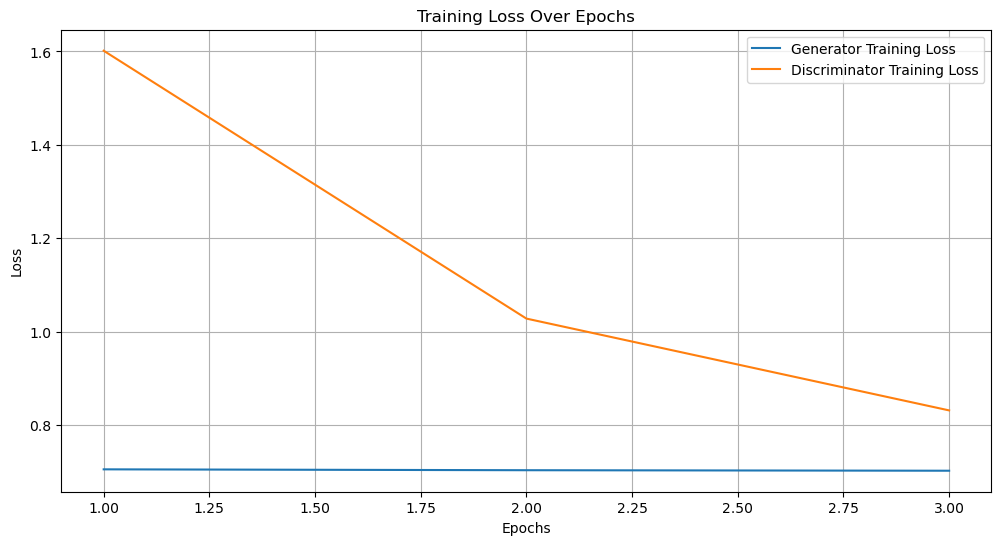

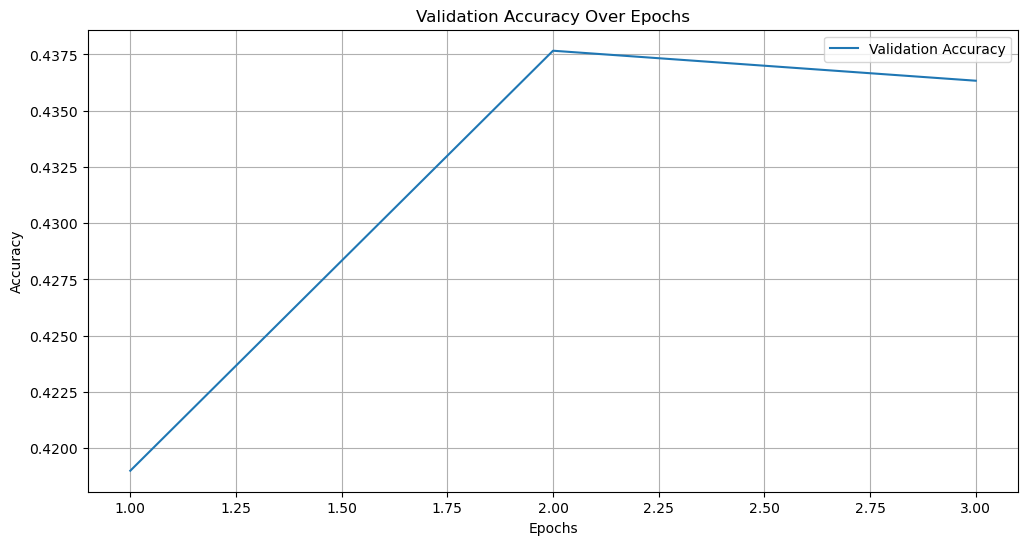

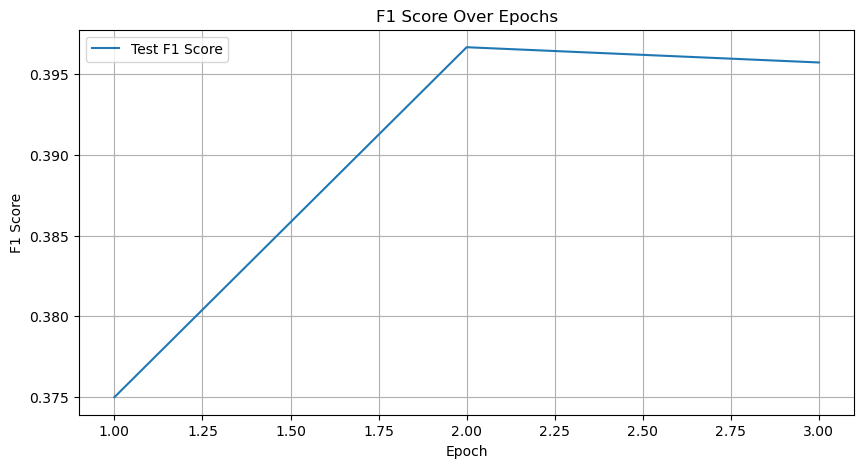

In [35]:
# Plotting training statistics
epochs = [stat['epoch'] for stat in training_stats]
gen_losses = [stat['Training Loss generator'] for stat in training_stats]
dis_losses = [stat['Training Loss discriminator'] for stat in training_stats]
valid_accuracies = [stat['Valid. Accur.'] for stat in training_stats]
# Plot the training and validation losses
plt.figure(figsize=(12, 6))
plt.plot(epochs, gen_losses, label='Generator Training Loss')
plt.plot(epochs, dis_losses, label='Discriminator Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Add this line to enable the grid
plt.show()
# Plot the validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, valid_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  # Add this line to enable the grid
plt.show()
# Plot F1 scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_train_epochs + 1), test_f1_scores, label='Test F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score Over Epochs')
plt.legend()
plt.grid(True)  # Add this line to enable the grid
plt.show()